In [ ]:
# !pip install goes2go

In [1]:
import goes2go  # register
import urllib.request
import pystac
import planetary_computer
import rioxarray
import xarray as xr

In [2]:
url = "https://planetarycomputer-staging.microsoft.com/api/stac/v1/collections/goes-mcmip/items/OR_ABI-L2-MCMIPC-M6_G17_s20212582121176_e20212582123549_c20212582124049"
def fix(item):
    item = item.clone()
    for k, v in item.assets.items():
        if v.href.startswith("blob://"):
            v.href = v.href.replace("blob://goeseuwest/", "https://goeseuwest.blob.core.windows.net/")
    return item

item = planetary_computer.sign(fix(pystac.read_file(url)))

In [3]:
f, _ = urllib.request.urlretrieve(item.assets["data"].href)
G2 = xr.open_dataset(f)

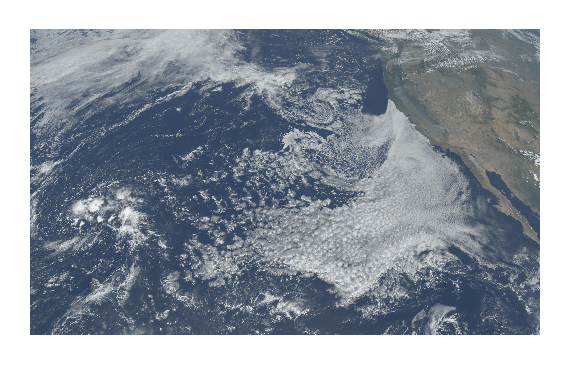

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

w = 720
h = 405
dpi = 300

fig, ax = plt.subplots(figsize=(w/dpi, h/dpi), dpi=dpi, subplot_kw=dict(projection=G2.rgb.crs))
img = ax.imshow(G2.rgb.TrueColor(), **G2.rgb.imshow_kwargs);
ax.set_axis_off()
fig.savefig("goes-thumbnail-west.png", dpi=dpi)

In [16]:
item = pystac.read_file("https://planetarycomputer-staging.microsoft.com/api/stac/v1/collections/goes-mcmip/items/OR_ABI-L2-MCMIPF-M6_G17_s20211801910321_e20211801919399_c20211801919542")

In [17]:
f, _ = urllib.request.urlretrieve(item.assets["data"].href)
G2 = xr.open_dataset(f)

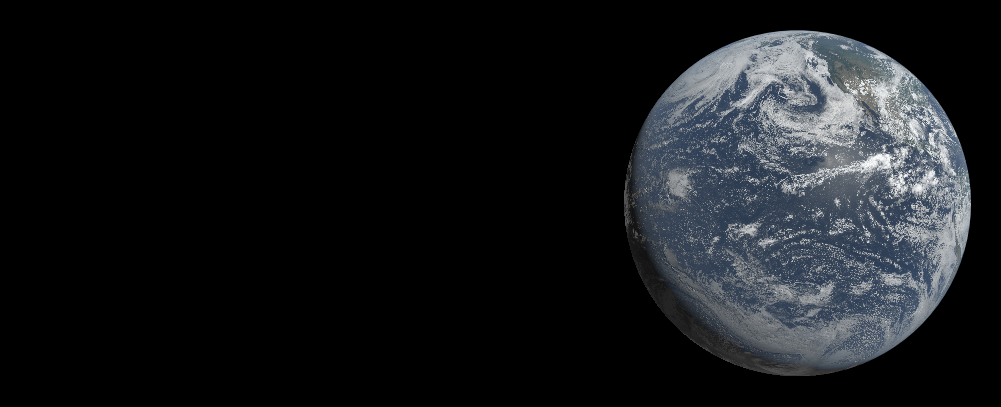

In [18]:
plt.style.use("dark_background")
dpi = 300
w = 1800
h = 460

fig = plt.figure(figsize=(w / dpi, h / dpi), dpi=dpi)
gs = plt.GridSpec(100, 100)

ax1 = fig.add_subplot(gs[:, :10], projection=G2.rgb.crs)
ax1.set_axis_off()

ax = fig.add_subplot(gs[:, 10:], projection=G2.rgb.crs)
img = ax.imshow(G2.rgb.TrueColor(), **G2.rgb.imshow_kwargs);
ax.set_axis_off()
fig.savefig("goes-hero.png", dpi=dpi)